# AN4 Dataset Analysis

In [ ]:
import seaborn as sb
import pandas as pd
import numpy as np
import tqdm
from typing import List
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
from parser import get_dataset_splits
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# load dataset splits
sample_rate = 16000
test_set, train_set, val_set = get_dataset_splits(sample_rate)
set2df = {"train": train_set, "val": val_set, "test": test_set}
train_set

# Splits Analysis

In [4]:
for set_name in set2df:
    print(f"Number of samples in {set_name} set:{len(set2df[set_name])}")

Number of samples in train set:853
Number of samples in val set:95
Number of samples in test set:130


# Vocabulary analysis

In [5]:
def get_text_words_list(text) -> List[str]:
    words = text.split()
    return words

def count_words(corpus: pd.Series) -> int:
    corpus_words = corpus.map(lambda text: get_text_words_list(text)).explode()
    corpus_freq_dict = corpus_words.value_counts().to_dict()
    return len(corpus_freq_dict)

for set_name in set2df:
    print(f"{set_name}    ------------------------------------------")
    n_words = count_words(set2df[set_name]['text'])
    print(f"Number of different words in {set_name} set:{n_words}")
    print(f"Number of different speakers in {set_name} set:{set2df[set_name]['speaker'].nunique()}")

train    ------------------------------------------
Number of different words in train set:98
Number of different speakers in train set:74
val    ------------------------------------------
Number of different words in val set:67
Number of different speakers in val set:56
test    ------------------------------------------
Number of different words in test set:69
Number of different speakers in test set:10


In [6]:
# compute splits vocabulary
total_char_voc = set()
for set_name in set2df:
    corpus = set2df[set_name]['text']
    corpus_words = corpus.map(lambda text: get_text_words_list(text)).explode()
    cur_char_voc = sorted(set(corpus_words.map(lambda text:list(text)).explode()))
    print(f"{set_name} character vocabulary:\n{cur_char_voc}")
    total_char_voc.update(cur_char_voc)

print(f"All dataset character vocabulary:\n{sorted(total_char_voc)}")

train character vocabulary:
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
val character vocabulary:
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
test character vocabulary:
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
All dataset character vocabulary:
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


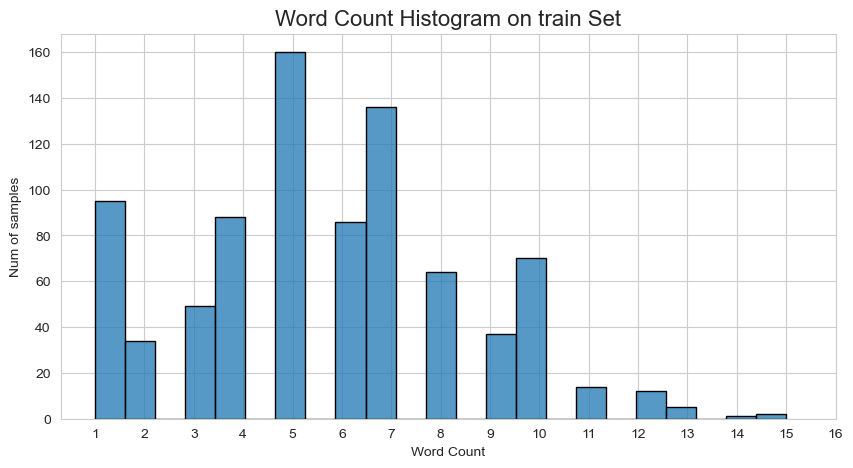

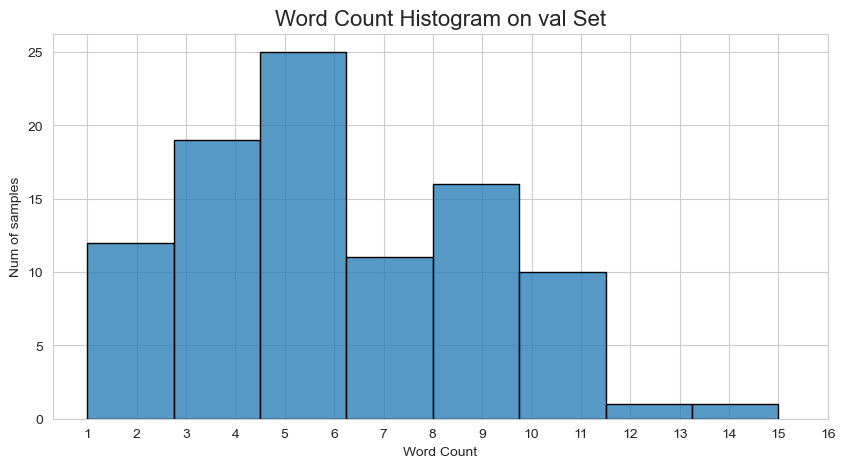

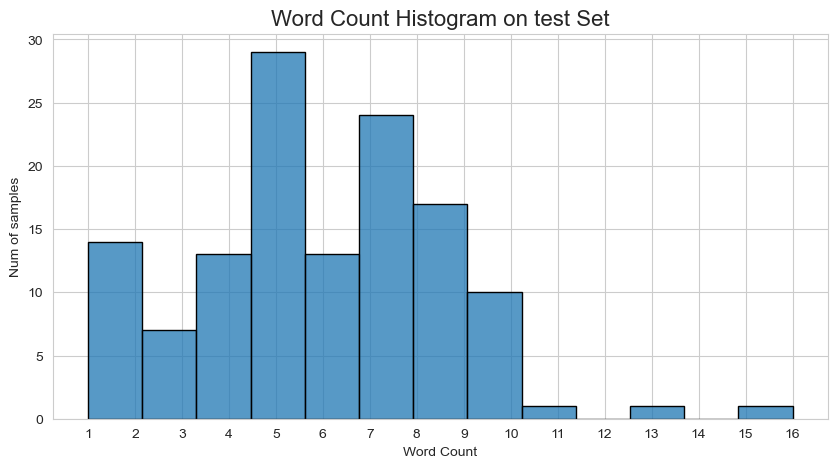

In [7]:
def get_text_words_list(text:str) -> List[str]:
    words = text.split()
    return words

def plot_words_count_hist(corpus: pd.Series, name=""):
    fig, ax = plt.subplots()
    fig.set_size_inches(10,5)
    p = sb.histplot(corpus.map(lambda text: len(get_text_words_list(text))),edgecolor='black',linewidth=1)
    p.set_title(f'Word Count Histogram on {name} Set', fontsize=16)
    p.set_xlabel('Word Count')
    p.set_ylabel('Num of samples')
    ax.grid(True)
    ax.set_xticks(np.arange(1,17))

for set_name in set2df:
    plot_words_count_hist(set2df[set_name]['text'], name=set_name)

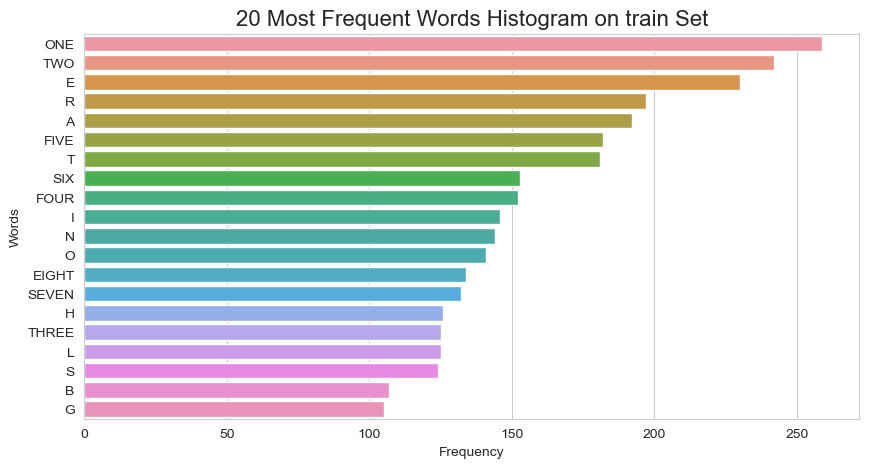

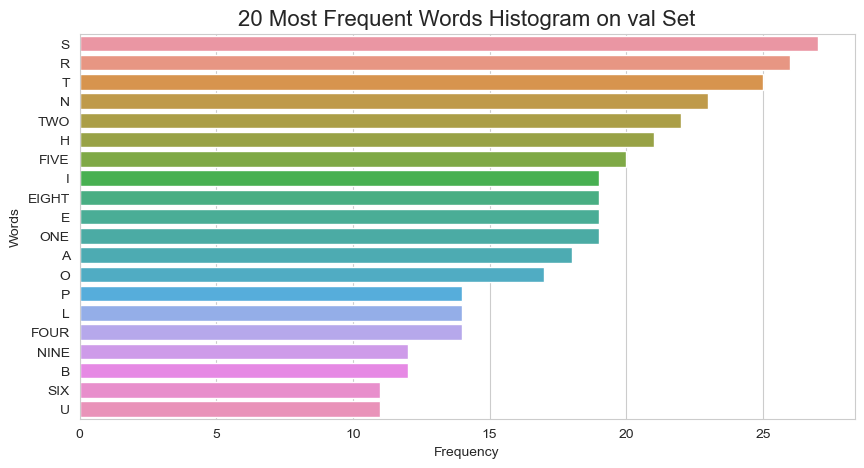

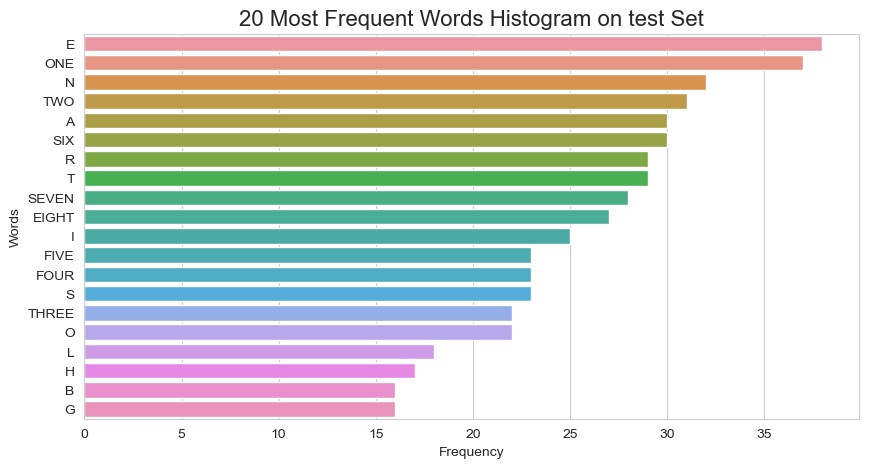

In [9]:
def plot_top_n_words(corpus: pd.Series, n: int, name=""):
    corpus_words = corpus.map(lambda text: get_text_words_list(text)).explode()
    corpus_words_dict = corpus_words.value_counts()[:n].to_dict()
    fig, ax = plt.subplots()
    fig.set_size_inches(10,5)
    p = sb.barplot(x=list(corpus_words_dict.values()),y=list(corpus_words_dict.keys()))
    p.set_title(f'{n} Most Frequent Words Histogram on {name} Set', fontsize=16)
    p.set_xlabel('Frequency')
    p.set_ylabel('Words')
    ax.xaxis.grid(True)


for set_name in set2df:
    plot_top_n_words(set2df[set_name]['text'], 20, name=set_name)

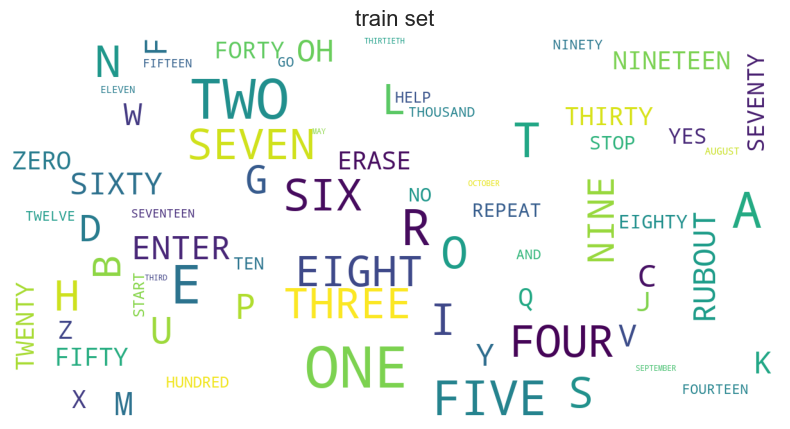

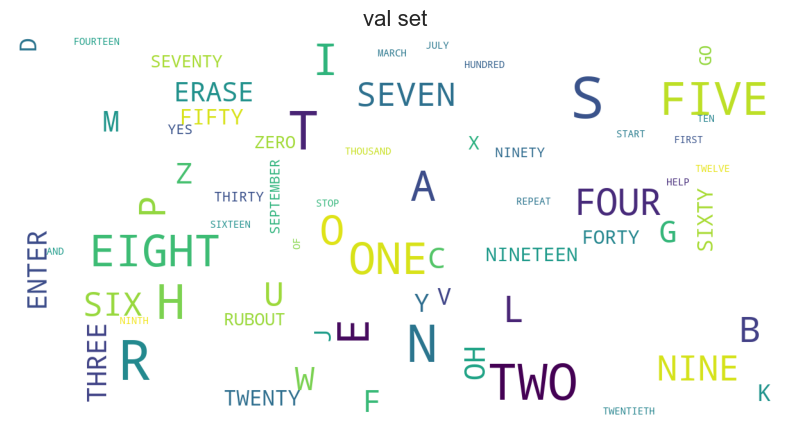

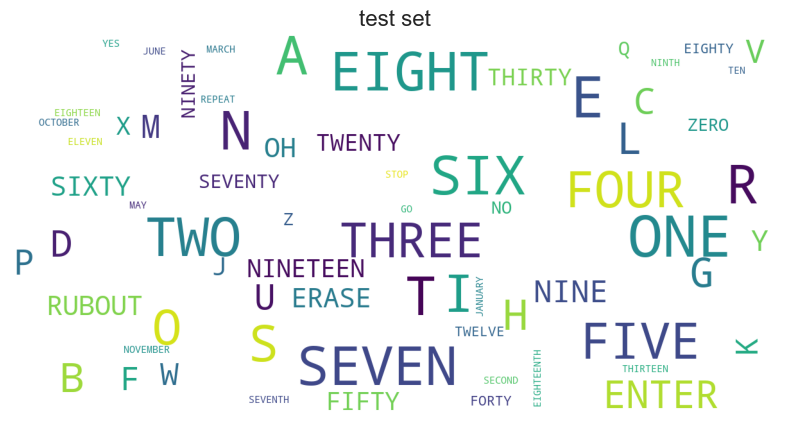

In [16]:
def plot_wordcloud(corpus: pd.Series, set_name=""):
    corpus_words = corpus.map(lambda text: get_text_words_list(text)).explode()
    corpus_freq_dict = corpus_words.value_counts().to_dict()

    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud = wordcloud.generate_from_frequencies(corpus_freq_dict)

    fig = plt.figure(1, figsize=(10, 5))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.title(f"{set_name} set", fontsize=16)
    # Add a frame around the plot
    plt.gca().set_frame_on(True)
    plt.show()

for set_name in set2df:
    plot_wordcloud(set2df[set_name]['text'], set_name=set_name)


In [33]:
print("Words not in train set:")
corpus_words = {}
corpus_freq_dict = {}
for set_name in set2df:
    df = set2df[set_name]['text'].map(lambda text: get_text_words_list(text)).explode()
    corpus_words[set_name] = set(df.unique())
    corpus_freq_dict[set_name] = df.value_counts().to_dict()
for set_name in set2df:
    diff = corpus_words[set_name] - corpus_words["train"]
    print(set_name+":\n",f"size of difference {len(diff)}")
    print(" different words:",[f"{w} {corpus_freq_dict[set_name][w]} times" for w in diff])


Words not in train set:
train:
 size of difference 0
 different words: []
val:
 size of difference 1
 different words: ['TWENTIETH 1 times']
test:
 size of difference 2
 different words: ['NOVEMBER 1 times', 'THIRTEEN 1 times']


# Audio files analysis

In [34]:
print("Speakers not in train set:")
set_speakers = {}
for set_name in set2df:
    set_speakers[set_name] = set(set2df[set_name]['speaker'].unique())
for set_name in set2df:
    diff = set_speakers[set_name] - set_speakers["train"]
    print(set_name, f" size of difference {len(diff)} --------------------")
    print(diff)


Speakers not in train set:
train  size of difference 0 --------------------
set()
val  size of difference 0 --------------------
set()
test  size of difference 10 --------------------
{'mmxg', 'fvap', 'marh', 'fcaw', 'miry', 'fjlp', 'mjwl', 'mjgm', 'menk', 'mdms2'}


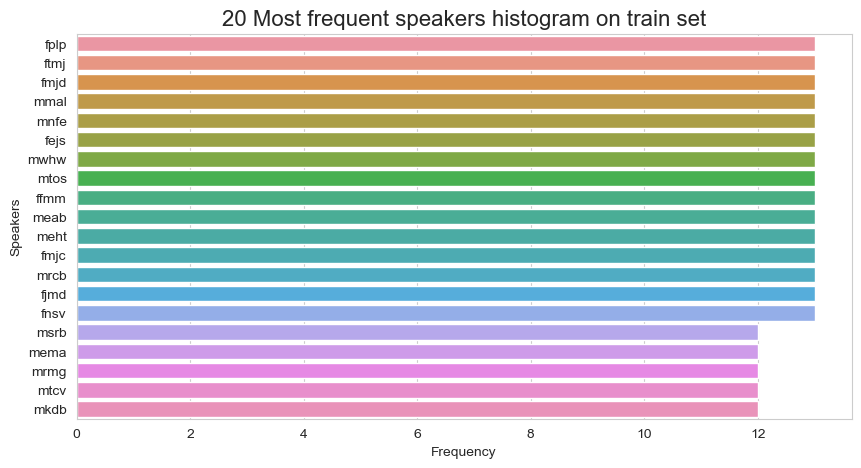

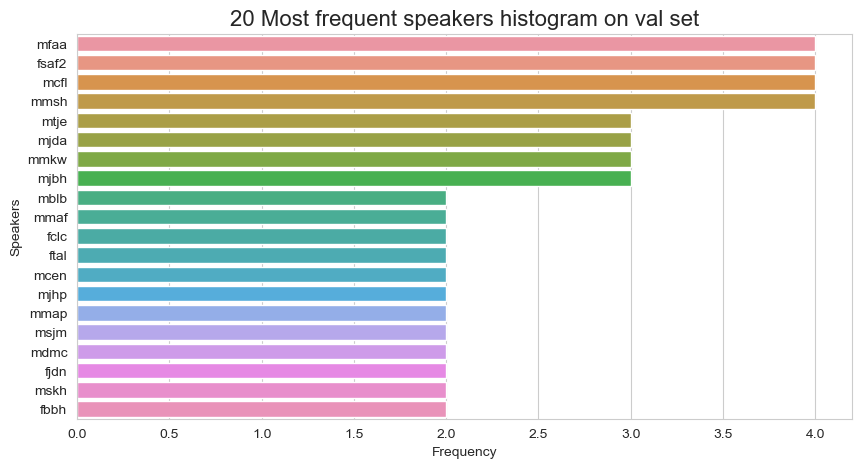

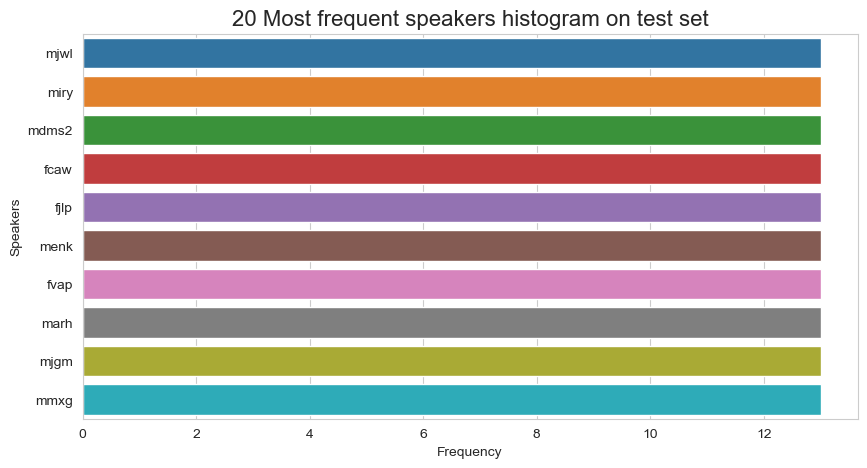

In [11]:
def plot_top_n_speakers(speakers: pd.Series, n: int, name=""):
    speakers_count_dict = speakers.value_counts()[:n].to_dict()
    fig, ax = plt.subplots()
    fig.set_size_inches(10,5)
    p = sb.barplot(x=list(speakers_count_dict.values()),y=list(speakers_count_dict.keys()))
    p.set_title(f'{n} Most frequent speakers histogram on {name} set', fontsize=16)
    p.set_xlabel('Frequency')
    p.set_ylabel('Speakers')
    ax.xaxis.grid(True)

for set_name in set2df:
    plot_top_n_speakers(set2df[set_name].speaker, 20, set_name)


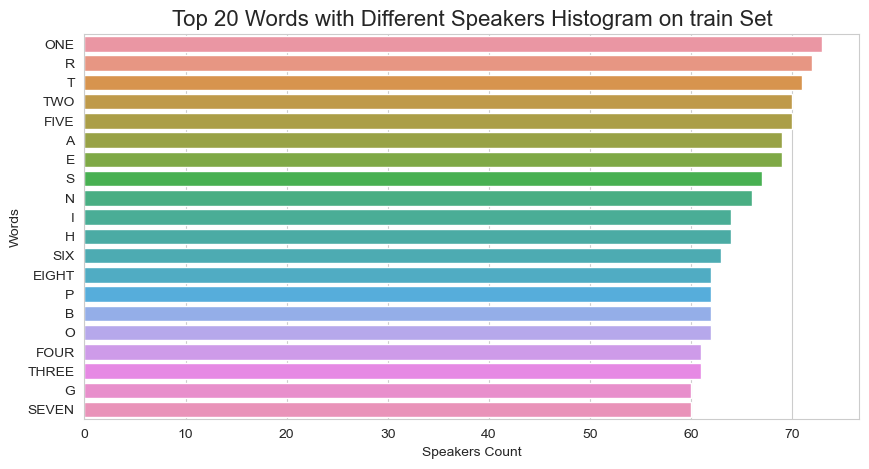

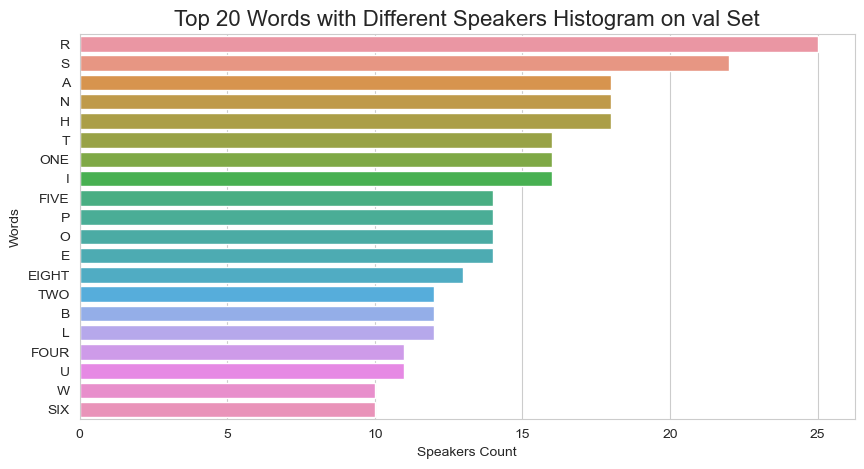

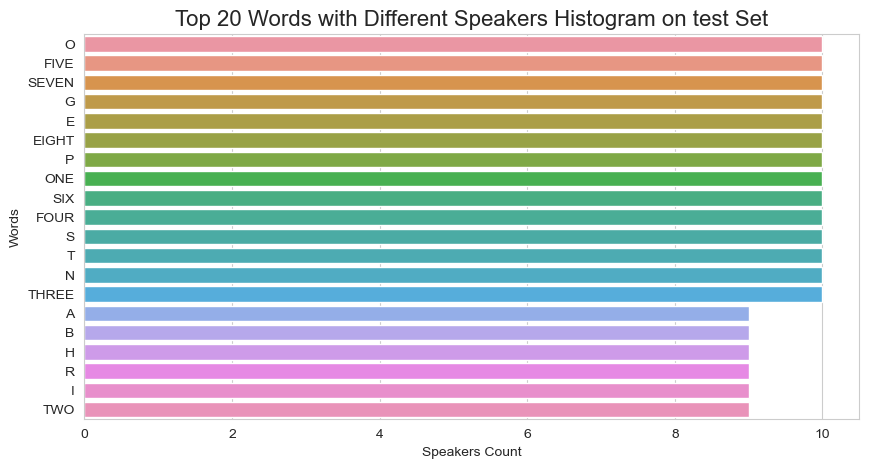

In [12]:
def plot_top_n_speakers_words(text2speaker_df:pd.DataFrame, n:int, name:str):
    text2speaker_df["words"] = text2speaker_df["text"].map(lambda text: get_text_words_list(text))
    word2speaker_df = text2speaker_df.loc[:,["words","speaker"]].explode("words")
    top_n_word2speaker_dict = word2speaker_df.groupby("words")["speaker"].nunique().sort_values(ascending=False)[:n].to_dict()
    fig, ax = plt.subplots()
    fig.set_size_inches(10,5)
    p = sb.barplot(x=list(top_n_word2speaker_dict.values()),y=list(top_n_word2speaker_dict.keys()))
    p.set_title(f'Top {n} Words with Different Speakers Histogram on {name} Set', fontsize=16)
    p.set_xlabel('Speakers Count')
    p.set_ylabel('Words')
    ax.xaxis.grid(True)

for set_name in set2df:
    plot_top_n_speakers_words(set2df[set_name].loc[:,["text","speaker"]],20,set_name)

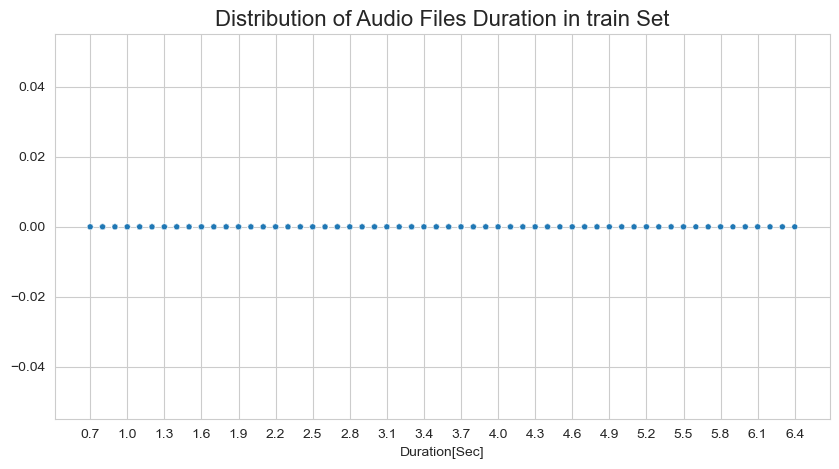

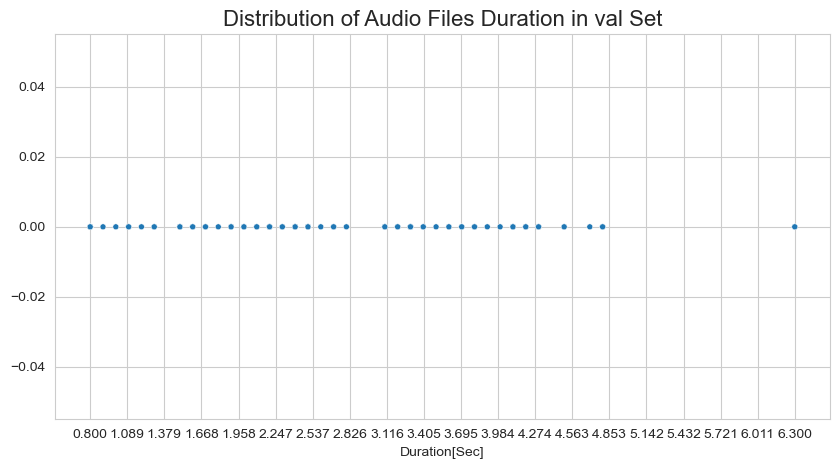

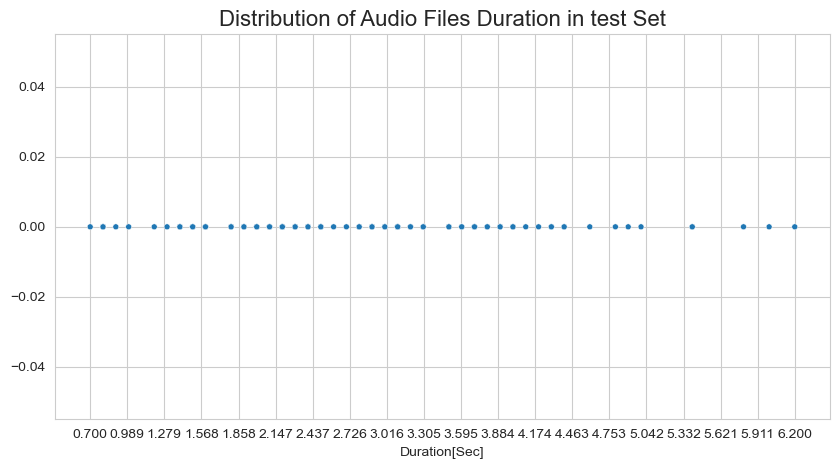

In [13]:
def plot_audio_files_duration(durations: pd.DataFrame, name: str):
    fig, ax = plt.subplots()
    fig.set_size_inches(10,5)
    p = sb.scatterplot(x=set2df[name]['duration'],y=[0]*set2df[name]['duration'].size,size=0.1,legend=False)
    p.set_title(f"Distribution of Audio Files Duration in {name} Set", fontsize=16)
    p.set_xlabel("Duration[Sec]")
    ax.set_xticks(np.linspace(set2df[name]['duration'].min(), set2df[name]['duration'].max(), 20))
    plt.show()

for set_name in set2df:
    plot_audio_files_duration(set2df[set_name],set_name)

In [38]:
set_name = 'train'
idx = np.random.randint(0,len(set2df['train']))
audio = set2df['train'].loc[idx]['audio']
file_name = set2df['train'].loc[idx]['wav_name']
audio_caption = set2df['train'].loc[idx]['text']
print(f"Caption of {file_name}.wav from {set_name} Set:\n{audio_caption}")


Caption of cen3-fbbh-b.wav from train Set:
FIFTY ONE FIFTY SIX


In [39]:
print(f"Play {file_name}.wav from {set_name} Set:")
ipd.Audio(data=audio,rate=sample_rate)

Play cen3-fbbh-b.wav from train Set:


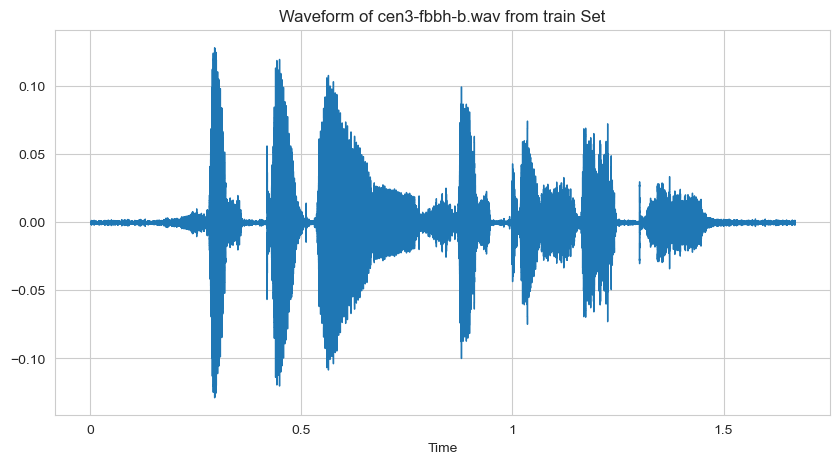

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
librosa.display.waveshow(audio)
ax.set_title(f"Waveform of {file_name}.wav from {set_name} Set")
plt.show()

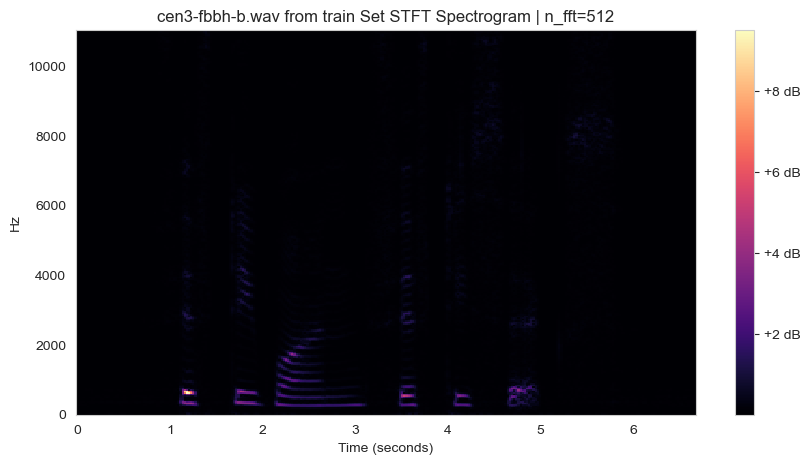

In [41]:
n_fft = 512
S = np.abs(librosa.stft(audio, n_fft=n_fft))
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S, y_axis='linear', x_axis='s', ax=ax)
ax.set_title(f'{file_name}.wav from {set_name} Set STFT Spectrogram | n_fft={n_fft}')
fig.colorbar(img, ax=ax, format="%+2.0f dB") # todo ori: time is not in sec need to change...
plt.show()

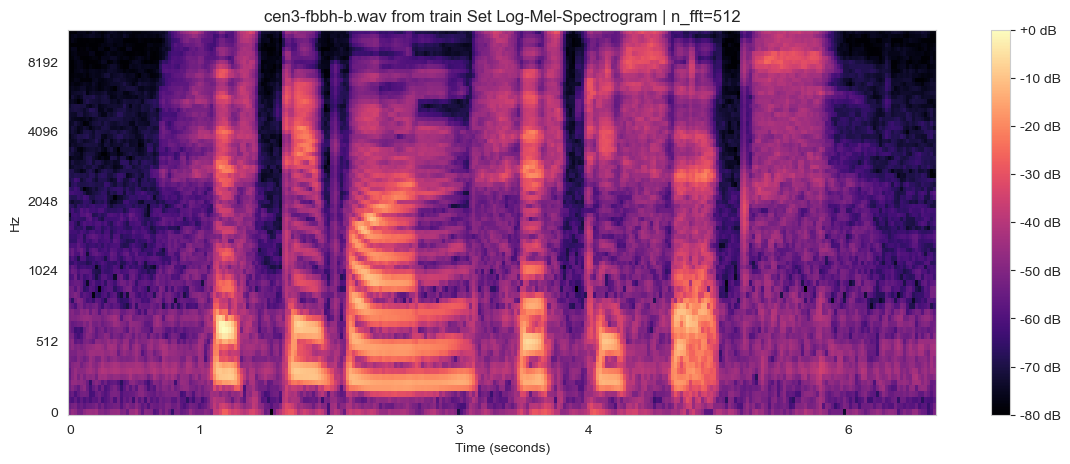

In [42]:
n_fft = 512
hop_size = n_fft // 4
n_filterbanks = 80

S = librosa.feature.melspectrogram(y=audio, n_fft=n_fft, hop_length=hop_size,n_mels=n_filterbanks)
S_dB = librosa.power_to_db(S, ref=np.max)
fig, ax = plt.subplots(figsize=(14,5))
img = librosa.display.specshow(S_dB, y_axis='mel', x_axis='s', ax=ax)
ax.set_title(f'{file_name}.wav from {set_name} Set Log-Mel-Spectrogram | n_fft={n_fft}')
fig.colorbar(img, ax=ax, format="%+2.0f dB") # todo ori: time is not in sec need to change...
plt.show()

Finding the best frame size and percentile for splitting the audio files into words:

In [ ]:
from utilities import silence_split

def find_best_amp_percentile(split):
    min_dist = np.inf
    best_th = 0
    best_percentile = 0
    best_frame_size = 0
    for frame_size in tqdm.tqdm(range(1000,2000,100),f" Finding best frame_size and percentile..."):
        for th in np.arange(0, 1, 0.01):
            cur_sum_dist = 0
            for index, row in split.iterrows():
                n_words = len(row['text'].split(' '))
                audio = row['audio']
                splits = silence_split(audio, frame_size, frame_size-1, th, 90)
                n_split = len(splits)
                cur_sum_dist += np.abs(n_words - n_split)

            avg_dist = cur_sum_dist / len(split)
            if min_dist > avg_dist:
                min_dist = avg_dist
                best_frame_size = frame_size
                best_th = th

    print(f"frame_size={best_frame_size}, threshold={best_th} with avg dist = {min_dist}")
    return best_percentile

for set in set2df:
    print(f"set={set}:")
    find_best_amp_percentile(set2df[set])